
## **Quadratic Equation**



$$
ax^2 + bx + c = 0
$$

### **Formula for Roots**

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

---

### **Three Conditions**

1. **Two distinct real roots**

   * Condition: $b^2 - 4ac > 0$
   * Roots:

     $$
     x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}, \quad x_2 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}
     $$

2. **One real root (repeated root)**

   * Condition: $b^2 - 4ac = 0$
   * Root:

     $$
     x = \frac{-b}{2a}
     $$

3. **Two complex (non-real) roots**

   * Condition: $b^2 - 4ac < 0$
   * No real roots


![Screenshot 2025-09-04 033254.png](<attachment:Screenshot 2025-09-04 033254.png>)
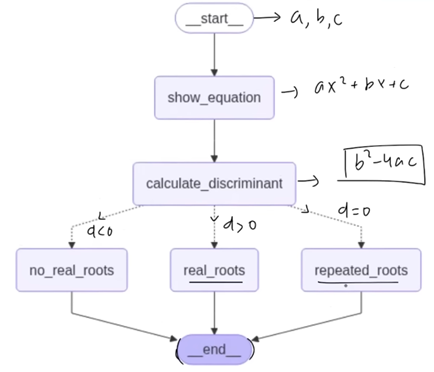

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
# create the state

class QuadState(TypedDict):
    
    a : int
    b : int
    c : int
    
    equation : str
    discriminant : float
    result : str
    

In [3]:
def show_equation(state : QuadState):
    
    equation = f"{state['a']}x**2 + {state['b']}*x + {state['c']}"
    
    return {'equation' : equation}

In [4]:
def calculate_discriminant(state : QuadState):
    
    discriminant = state['b']**2 - (4*state['a'] * state['c'])
    
    return {'discriminant': discriminant}
    
    

In [5]:
def real_roots(state : QuadState):
    
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    
    result = f'The roots are {root1} and {root2}'
    
    return {'result' : result}




def repeated_root(state : QuadState):
    
    root1 = (-state['b'])/(2*state['a'])
    
    result = f'The roots is {root1}'
    
    return {'result' : result}



def no_real_roots(state : QuadState):
    
    result = f"no real roots"
    
    return {'result' : result}

In [6]:
## to check conditions we need a condition function

def check_condition(state : QuadState) -> Literal["real_roots","repeated_root","no_real_roots"]:
    
    if state['discriminant'] > 0 :
        return "real_roots"
    elif state['discriminant'] == 0 :
        return "repeated_root"
    else:
        return "no_real_roots"

In [8]:
graph = StateGraph(QuadState)


# nodes

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)

graph.add_node('real_roots',real_roots)
graph.add_node('repeated_root', repeated_root)
graph.add_node('no_real_roots',no_real_roots)

# edges

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation','calculate_discriminant')
graph.add_edge('calculate_discriminant', END)

## 3 conditional edges
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_root', END)
graph.add_edge('no_real_roots', END)


workflow = graph.compile()

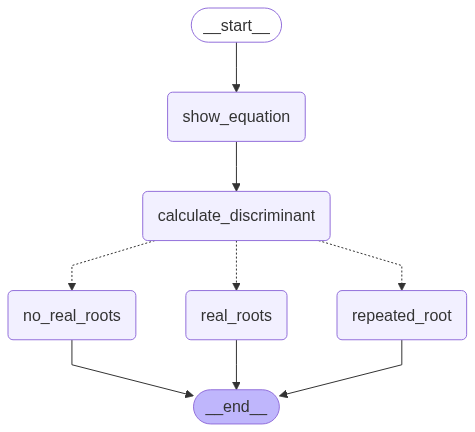

In [9]:
workflow

In [10]:
initial_state = {'a': 4, 'b': -5, 'c':-4}

workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x**2 + -5*x + -4',
 'discriminant': 89,
 'result': 'The roots are 1.8042476415070754 and -0.5542476415070754'}